# Learning outcomes
1. Geometric transformation: rotation, translation, affine transformation and perspective transformation.
2. Drawing functions
    - line
    - circle
    - ellipse
    - rectangle
    - text
3. Bitwise operation
    - OR, AND, XOR, NOT
4. Convolution, Smoothing and shaping. The operations are central to CNN

## Setup

In [1]:
import sys
assert sys.version_info >=(3,7)

import numpy as np
import cv2 as cv
from util_func import *

In [2]:
!pip install scipy

## Geometric transformation

In [3]:
img = cv.imread("images/lena.jfif")

h, w = img.shape[:2]
tx = 50
ty = 80
M = np.float32([[1, 0, tx], [0, 1, ty]])

dst = cv.warpAffine(img, M, (w+tx, h+ty))

show_img("translation", dst)

## Rotation

In [4]:
yc, xc = h // 2, w // 2
angle = 45

M = cv.getRotationMatrix2D((xc, yc), angle, 1)
dst = cv.warpAffine(img, M, (w, h))

show_img("rotation", dst)

## Affine transformation
(preserve parallel line but perpestive transform wont preserve parallel line)

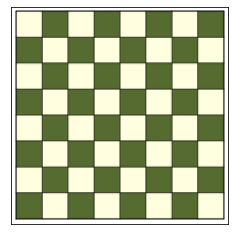

In [5]:
img = cv.imread("images/chessboard.png")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_copy = img.copy()

plt_img(img)

(<AxesSubplot:title={'center':'affine transform'}>, None)

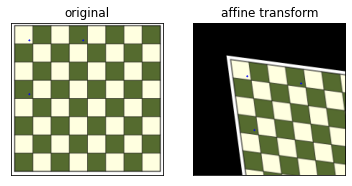

In [6]:
h, w = img.shape[:2]
# 3 pair of points
p0 = np.float32([[25, 25], [100, 25], [25, 100]])
p1 = np.float32([[75, 75], [150, 85], [85, 150]])

for pt in p0:
    cv.circle(img, (int(pt[0]), int(pt[1])), 1, (0, 0, 255), -1)
    
# get the M
M = cv.getAffineTransform(p0, p1)
dst = cv.warpAffine(img_copy, M, (w, h))

for pt in p1:
    cv.circle(dst, (int(pt[0]), int(pt[1])), 1, (0, 0, 255), -1)
    
plt.subplot(121), plt_img(img, title="original")
plt.subplot(122), plt_img(dst, title="affine transform")


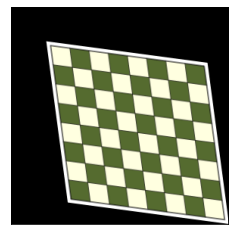

In [7]:
dst_new = cv.warpAffine(img_copy, M, (w+75, h+75))

plt_img(dst_new)

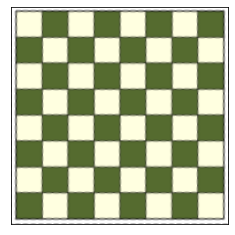

In [8]:
M_inv = cv.getAffineTransform(p1, p0)
ori_restore = cv.warpAffine(dst_new, M_inv, (w, h))

plt_img(ori_restore)

## Perspective transform

In [9]:
img = cv.imread("images/name_card_sample.webp")
show_img("name_card", img, adjust=True)

In [10]:
# to get the corners, mouse callback function
p = []

def mouse(event, x, y, flags, params):
    if event == cv.EVENT_LBUTTONDOWN:
        print((x, y))
        p.append((x, y))
        cv.circle(img, (x, y), 2, (0, 0, 255), -1)
        cv.imshow("img", img)
        
cv.imshow("img", img)
cv.setMouseCallback("img", mouse)
cv.waitKey(0)
cv.destroyAllWindows()

(115, 105)
(766, 45)
(917, 267)
(70, 388)


In [11]:
from scipy.spatial.distance import euclidean

In [12]:
w1 = euclidean(p[0], p[1])
w2 = euclidean(p[2], p[3])

h1 = euclidean(p[0], p[3])
h2 = euclidean(p[1], p[2])

H = max(h1, h2)
W = max(w1, w2)

p_array = np.float32(p)
dst = np.float32([[0, 0], [W-1, 0], [W-1, H-1], [0, H-1]])

M = cv.getPerspectiveTransform(p_array, dst)
warp = cv.warpPerspective(img, M, (int(W), int(H)))

cv.namedWindow("img", cv.WINDOW_NORMAL)
cv.imshow("img", img)
show_img("warp", warp)

### Exercise

In [13]:
img = cv.imread("images/dice.jfif")
show_img("dice", img, adjust=True)

In [14]:
# to get the corners, mouse callback function
p = []

def mouse(event, x, y, flags, params):
    if event == cv.EVENT_LBUTTONDOWN:
        print((x, y))
        p.append((x, y))
        cv.circle(img, (x, y), 2, (0, 0, 255), -1)
        cv.imshow("img", img)
        
cv.imshow("img", img)
cv.setMouseCallback("img", mouse)
cv.waitKey(0)
cv.destroyAllWindows()

(10, 63)
(75, 97)
(80, 134)
(16, 100)


In [15]:
w1 = euclidean(p[0], p[1])
w2 = euclidean(p[2], p[3])

h1 = euclidean(p[0], p[3])
h2 = euclidean(p[1], p[2])

H = max(h1, h2)
W = max(w1, w2)

p_array = np.float32(p)
dst = np.float32([[0, 0], [W-1, 0], [W-1, H-1], [0, H-1]])

M = cv.getPerspectiveTransform(p_array, dst)
warp = cv.warpPerspective(img, M, (int(W), int(H)))

cv.namedWindow("img", cv.WINDOW_NORMAL)
cv.imshow("img", img)
show_img("warp", warp)

## Drawing functions

#### Line

In [16]:
img = cv.imread("images/dog.jfif")

print(img.shape)

(168, 300, 3)


In [17]:
img_copy = img.copy()
cv.line(img_copy, (80, 150), (200, 50), (0, 0, 255), 4, cv.LINE_AA)
show_img("line", img_copy)

#### Circle

In [18]:
img_copy = img.copy()
cv.circle(img_copy, (145, 50), 40, (100, 100, 100), 2, cv.LINE_AA)
show_img("circle", img_copy)

#### Ellipse

In [19]:
img_copy = img.copy()
axes = (25, 50)
angle = 0

cv.ellipse(img_copy, (145, 50), axes, angle, 0, 360, (50, 100, 150), 2)
show_img("ellipse", img_copy)

#### Rectangle

In [20]:
img_copy = img.copy()
cv.rectangle(img_copy, (100, 10), (190, 90), (0, 0, 255), 4, cv.LINE_AA)
show_img("rectangle", img_copy)

#### Text

In [21]:
img_copy = img.copy()

cv.putText(img_copy, "I am a happy dog!", (15, 150), cv.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 60), 2)
show_img("text", img_copy)

### Exercise

In [22]:
img = np.zeros((400,400), dtype=np.uint8)

yc, xc = img.shape[0] // 2, img.shape[1] // 2

radius = np.arange(20, 200, 15)

for r in radius:
    cv.circle(img, (xc, yc), r, 255,2)
    
cv.putText(img, "Bulleye", (20, 385), cv.FONT_HERSHEY_SIMPLEX, 0.6, 255, 2)

show_img("bulleye", img)

## Demo
We can develop a simple drawing tool / app with OpenCV GUI. Trackbar introduction.

In [23]:
WHITE = (255, 255, 255)
RED = (0, 0, 255)
BLUE = (255, 0, 0)
GREEN = (0, 255, 0)

CYAN = (255, 255, 0)
MAGENTA = (255, 0, 255)
YELLOW = (0, 255, 255)

colors = (RED, BLUE, GREEN, CYAN, MAGENTA, YELLOW, WHITE)

# define trackbar function, mouse callbacl function and finallt a white loop to display
# drawing
def nothing(x):
    pass

p0 = p1 = (0, 0)
def mouse(event, x, y, flags, params):
    global p0, p1
    if event == cv.EVENT_LBUTTONDOWN:
        p0 = (x,y)
        
    elif event == cv.EVENT_LBUTTONUP:
        p1 = (x, y)
        
        d = cv.getTrackbarPos("thickness", "window")
        if d==0:
            d=-1
        i = cv.getTrackbarPos("color", "window")
        color = colors[i]
        cv.rectangle(img, p0, p1, color, d)
        cv.imshow("window", img)
        
img = np.zeros((400, 400, 3), dtype=np.uint8)        
cv.namedWindow("window")
cv.createTrackbar("color", "window", 0, 6, nothing)
cv.createTrackbar("thickness", "window", 0, 10, nothing)
cv.setMouseCallback("window", mouse)

while(1):
    cv.imshow("window", img)
    k = cv.waitKey(1) & 0xFF
    if k==27:
        break
    if k==ord('c'):
        img[:] = 0
        
cv.destroyAllWindows()

### Bitwise operators

In [24]:
rect = np.zeros((400, 400), dtype = np.uint8)
rect[30:370, 30:370] = 255

circle = np.zeros((400, 400), dtype = np.uint8)
cv.circle(circle, (200, 200), 200, 255, -1)

cv.imshow("rect", rect)
show_img("circle", circle)

In [25]:
res_AND = cv.bitwise_and(rect, circle)
show_img("AND", res_AND)

In [26]:
res_OR = cv.bitwise_or(rect, circle)
show_img("OR", res_OR)

In [27]:
res_XOR = cv.bitwise_xor(rect, circle)
show_img("XOR", res_XOR)

In [28]:
res_not = cv.bitwise_not(rect)
show_img("NOT", res_not)

bitwise operation is an important process that make up segmentation pipeline.

In [29]:
img = cv.imread("images/dog.jfif")

# masking
h, w = img.shape[:2]
mask = np.zeros((h, w), dtype=np.uint8)

cv.circle(mask, (145, 50), 40, 255, -1)

face = cv.bitwise_and(img, img, mask=mask)

show_img("face", face)

## Convolution

<img src = "image_embed/2D_Convolution_Animation.gif" alt="Alternative text" />

### Identity kernel

In [30]:
kernel = np.zeros((3, 3))
kernel[1, 1] = 1

img = cv.imread("images/opencv_logo.png")

dst = cv.filter2D(img, -1,  kernel)

cv.imshow("img", img)
show_img("identity", dst)

### Use cases
 - CNN
 - smoothing / denoising
 - edge detection
 - sharpening

In [31]:
# sharpening
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0,-1, 0]])

img = cv.imread("images/dog.jfif")
sharpen = cv.filter2D(img, -1, kernel)

cv.imshow("dog", img)
show_img("sharpen", sharpen)

In [32]:
# Blurring
kernel = np.ones((5, 5)) / 25.0

blur = cv.filter2D(img, -1, kernel)

show_img("blur", blur)

In [33]:
unsharp_masking = cv.addWeighted(img, 1.75, blur, -0.75, 0)

show_img("unsharp masking", unsharp_masking)

### Blurring 
4 function:
- `cv.blur()`: average filter
- `cv.GaussianBlur()`: Gaussian filter, efficient in removing Gaussian noise
- `cv.medianBlur()`: median filter, eliminating salt and pepper noise
- `cv.bilateralFilter()`: edge-preserving filter

In [34]:
cv.GaussianBlur
cv.medianBlur
cv.bilateralFilter

<function bilateralFilter>

# Weekly Activity

## Question 1

In [35]:
# Q1: Rotate image by 45 degrees without cropping the sides of the image.
!pip install imutils

In [38]:
import imutils

# Load the input image
input_image_path = "images/lena.jfif"
img = cv.imread(input_image_path)

# Get image dimensions
h, w = img.shape[:2]

# Define the rotation angle in degrees
angle = 45

# Calculate the rotation center
yc, xc = h//2, w//2

angle = -45

# Apply the rotation to the image
rotated_image = imutils.rotate_bound(img, angle)

# Display the original and rotated images
show_img("rotation", rotated_image)

## Question 2

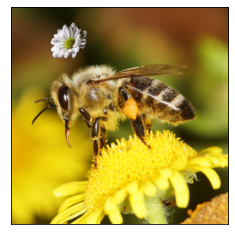

In [39]:
# Q2
# Load two images
bee = cv.imread('images/native-bee.png')
flower = cv.imread('images/flower.jfif')
assert bee is not None, "file could not be read, check with os.path.exists()"
assert flower is not None, "file could not be read, check with os.path.exists()"

# I want to put logo on top-left corner, So I create a ROI
h, w = flower.shape[:2]
roi = bee[:h, :w]

# Now create a mask of logo and create its inverse mask also
flowergray = cv.cvtColor(flower, cv.COLOR_BGR2GRAY)
ret, mask = cv.threshold(flowergray, 75, 255, cv.THRESH_BINARY)
mask_inv = cv.bitwise_not(mask)

# Now black-out the area of logo in ROI
bee_bg = cv.bitwise_and(roi, roi, mask = mask_inv)

# Take only region of logo from logo image.
flower_fg = cv.bitwise_and(flower, flower, mask = mask)

# Put logo in ROI and modify the main image
dst = cv.add(bee_bg, flower_fg)
bee[:h, :w ] = dst

bee = cv.cvtColor(bee, cv.COLOR_BGR2RGB)
plt_img(bee)

## Question 3

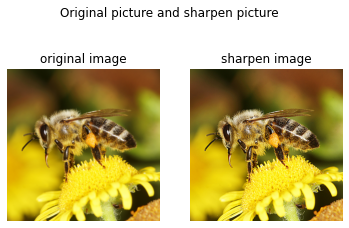

In [40]:
# Q3: Apply custom sharpening kernel of aperture size 3 and 5 as shown below on 'native-bee.png'

# sharpening
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0,-1, 0]])

img = cv.imread("images/native-bee.png")
sharpen = cv.filter2D(img, -1, kernel)

img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
sharpen = cv.cvtColor(sharpen, cv.COLOR_BGR2RGB)

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("original image")
plt.axis("off")
plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(sharpen)
plt.title("sharpen image")
plt.axis("off")
plt.xticks([]), plt.yticks([])

plt.suptitle("Original picture and sharpen picture")
plt.show()

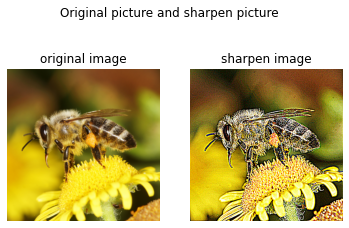

In [41]:
# Q3: Apply custom sharpening kernel of aperture size 3 and 5 as shown below on 'native-bee.png'

# sharpening
kernel = np.array([[-1, -1, -1, -1, -1], [-1, -1, -1, -1, -1], [-1, -1, 25, -1, -1], [-1, -1, -1, -1, -1], [-1, -1, -1, -1, -1]])

img = cv.imread("images/native-bee.png")
sharpen = cv.filter2D(img, -1, kernel)

img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
sharpen = cv.cvtColor(sharpen, cv.COLOR_BGR2RGB)

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("original image")
plt.axis("off")
plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(sharpen)
plt.title("sharpen image")
plt.axis("off")
plt.xticks([]), plt.yticks([])

plt.suptitle("Original picture and sharpen picture")
plt.show()

## Question 4

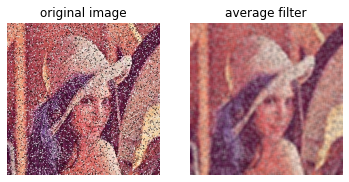

In [70]:
img = cv.imread("images/noise_lena.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
dst = cv.blur(img, (5, 5))

plt.subplot(1,2,1)
plt.imshow(img)
plt.title("original image")
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(dst)
plt.title("average filter")
plt.axis("off")

plt.show()

(([], []), ([], []))

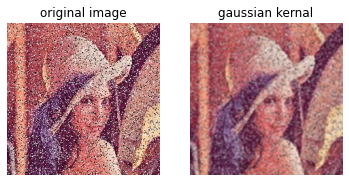

In [74]:
img = cv.imread("images/noise_lena.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
dst = cv.GaussianBlur(img, (5, 5), 0)

plt.subplot(1,2,1)
plt.imshow(img)
plt.title("original image")
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(dst)
plt.title("gaussian kernal")
plt.axis("off")
plt.xticks([]), plt.yticks([])



(([], []), ([], []))

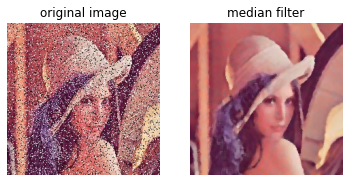

In [76]:
img = cv.imread("images/noise_lena.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
dst = cv.medianBlur(img, 5)

plt.subplot(1,2,1)
plt.imshow(img)
plt.title("original image")
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(dst)
plt.title("median filter")
plt.axis("off")
plt.xticks([]), plt.yticks([])


Image after using median filter is the most clearest image. Hence, noise in the image is salt and peper noise.